Importing the Libraries for Data-Description

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data from 'dataset.csv' file and create a dataframe

In [2]:
df = pd.read_csv('dataset.csv')
df.shape

(6055, 22)

In [2]:
df = pd.read_csv('dataset-1.csv')
df.shape

(6055, 23)

In [2]:
df = pd.read_csv('dataset-2.csv')
df.shape

(5790, 27)

In [3]:
df.head()

,Length of URL,Has IP address,Shortening Service,Having @ Symbol,Double Slash Redirecting,Prefix-Suffix,CTLD,HTTPS in Domain,Sensitive Words,Has Tilde,...,checking_sfh,request_url,url-of-anchor,links_in_meta_img,check_hidden_content,Current Domain Age,Matching Domain Name,Length of Domain,Google page index,Result
0,1,1,-1,1,1,-1,1,-1,1,1,...,-1,-1,-1,-1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,-1,-1,1,...,-1,1,-1,1,1,1,-1,1,1,1
2,1,1,1,1,1,1,1,-1,-1,1,...,-1,1,-1,1,1,1,-1,1,1,1
3,1,1,1,1,1,1,-1,-1,1,1,...,-1,-1,0,1,-1,-1,-1,-1,1,1
4,1,1,1,1,1,1,0,-1,1,1,...,-1,-1,-1,1,-1,1,-1,1,1,1


In [4]:
df.columns

Index(['Length of URL', 'Has IP address', 'Shortening Service',
       'Having @ Symbol', 'Double Slash Redirecting', 'Prefix-Suffix', 'CTLD',
       'HTTPS in Domain', 'Sensitive Words', 'Has Tilde', 'Has Port',
       'PhishID', 'frequency_of_a_tags', 'frequency_of_alltags',
       'presence_of_iframes', 'presence_of_popups', 'right_click_disabling',
       'checking_sfh', 'request_url', 'url-of-anchor', 'links_in_meta_img',
       'check_hidden_content', 'Current Domain Age', 'Matching Domain Name',
       'Length of Domain', 'Google page index', 'Result'],
      dtype='object')

In [5]:
df.columns.size

27

In [6]:
data_no_duplicates = df.drop_duplicates()
df = data_no_duplicates.dropna()

As the column names have leading white spaces, we will rename the columns

In [7]:
df.shape

(5790, 27)

In [8]:
df = df.drop('PhishID', axis = 1)

In [9]:
df.rename(columns={'Length of URL':'Length_of_URL', 'Has IP address':'Has_IP_address', 'Shortening Service':'Shortening_Service', 'Having @ Symbol':'Having_@_Symbol', 'Double Slash Redirecting':'Double_Slash_Redirecting', 'Prefix-Suffix':'Prefix-Suffix', 'CTLD':'CTLD', 'HTTPS in Domain':'HTTPS_in_Domain', 'Sensitive Words':'Sensitive_Words', 'Has Tilde':'Has_Tilde', 'Has Port':'Has_Port', 'Current Domain Age':'Current_Domain_Age' , 'Matching Domain Name':'Matching_Domain_Name', 'Length of Domain':'Length_of_Domain', 'Google page index':'Google_page_index','Result':'Result'}, inplace=True)

As we had merged two csv files to create a dataset, we need to check the unique values present in each column

In [10]:
df.shape

(5790, 26)

In [11]:
# Investigate unique values in the each column
unique_frequency_a = df['frequency_of_a_tags'].unique()
unique_all = df['frequency_of_alltags'].unique()
unique_iframes = df['presence_of_iframes'].unique()
unique_popups = df['presence_of_popups'].unique()
unique_rightclick = df['right_click_disabling'].unique()
unique_sfh = df['checking_sfh'].unique()
unique_request = df['request_url'].unique()
unique_url = df['url-of-anchor'].unique()
unique_meta = df['links_in_meta_img'].unique()
unique_R = df['Result'].unique()
unique_IP = df['Has_IP_address'].unique()
unique_SS = df['Shortening_Service'].unique()
unique_HAS = df['Having_@_Symbol'].unique()
unique_DSR = df['Double_Slash_Redirecting'].unique()
unique_PS = df['Prefix-Suffix'].unique()
unique_CTLD = df['CTLD'].unique()
unique_HID = df['HTTPS_in_Domain'].unique()
unique_SW = df['Sensitive_Words'].unique()
unique_HT = df['Has_Tilde'].unique()
unique_HP = df['Has_Port'].unique()
unique_hidden = df['check_hidden_content'].unique()
unique_R = df['Result'].unique()

print(unique_frequency_a)
print(unique_all)
print(unique_iframes)
print(unique_popups)
print(unique_rightclick)
print(unique_sfh)
print(unique_request)
print(unique_url)
print(unique_meta)
print(unique_R)
print(unique_IP)
print(unique_SS)
print(unique_HAS)
print(unique_DSR)
print(unique_PS)
print(unique_CTLD)
print(unique_HID)
print(unique_SW)
print(unique_HT)
print(unique_HP)
print(unique_hidden)
print(unique_R)

['-1' '1' 'frequency_of_a_tags']
['1' '0' '-1' 'frequency_of_alltags']
['1' 'presence_of_iframes']
['1' '-1' 'presence_of_popups']
['1' 'right_click_disabling' '-1']
['-1' '1' 'checking_sfh']
['-1' '1' '0' 'request_url']
['-1' '0' '1' 'url-of-anchor']
['-1' '1' '0' 'links_in_meta_img']
['1' 'Result' '-1']
['1' '-1' 'Has IP address']
['-1' '1' 'Shortening Service']
['1' '-1' 'Having @ Symbol']
['1' '-1' 'Double Slash Redirecting']
['-1' '1' 'Prefix-Suffix']
['1' '-1' '0' 'CTLD']
['-1' 'HTTPS in Domain']
['1' '-1' 'Sensitive Words']
['1' '-1' 'Has Tilde']
['-1' '1' 'Has Port']
['1' '-1' 'check_hidden_content']
['1' 'Result' '-1']


As there are white-space along with 1, 0, and -1 we need to remove rest of the things, and then convert the values to int 

In [12]:
validValues = {-1, 0, 1}

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[column].isin(validValues)]

# Convert all columns to integers (again after the filtering)
df = df.astype(int)

In [13]:
# Now you can use the DataFrame with valid integer values (1, -1, and 0)
print(df)

      Length_of_URL  Has_IP_address  Shortening_Service  Having_@_Symbol  \
0                 1               1                  -1                1   
1                 1               1                   1                1   
2                 1               1                   1                1   
3                 1               1                   1                1   
4                 1               1                   1                1   
...             ...             ...                 ...              ...   
5785              1               1                   1                1   
5786              1               1                   1                1   
5787              1               1                   1                1   
5788              1               1                   1                1   
5789              1               1                   1                1   

      Double_Slash_Redirecting  Prefix-Suffix  CTLD  HTTPS_in_Domain  \
0              

Again check for the unique values present in each column

In [14]:
# Investigate unique values in the each column
unique_frequency_a = df['frequency_of_a_tags'].unique()
unique_all = df['frequency_of_alltags'].unique()
unique_iframes = df['presence_of_iframes'].unique()
unique_popups = df['presence_of_popups'].unique()
unique_rightclick = df['right_click_disabling'].unique()
unique_sfh = df['checking_sfh'].unique()
unique_request = df['request_url'].unique()
unique_url = df['url-of-anchor'].unique()
unique_meta = df['links_in_meta_img'].unique()
unique_R = df['Result'].unique()
unique_IP = df['Has_IP_address'].unique()
unique_SS = df['Shortening_Service'].unique()
unique_HAS = df['Having_@_Symbol'].unique()
unique_DSR = df['Double_Slash_Redirecting'].unique()
unique_PS = df['Prefix-Suffix'].unique()
unique_CTLD = df['CTLD'].unique()
unique_HID = df['HTTPS_in_Domain'].unique()
unique_SW = df['Sensitive_Words'].unique()
unique_HT = df['Has_Tilde'].unique()
unique_HP = df['Has_Port'].unique()
unique_hidden = df['check_hidden_content'].unique()
unique_R = df['Result'].unique()

print(unique_frequency_a)
print(unique_all)
print(unique_iframes)
print(unique_popups)
print(unique_rightclick)
print(unique_sfh)
print(unique_request)
print(unique_url)
print(unique_meta)
print(unique_R)
print(unique_IP)
print(unique_SS)
print(unique_HAS)
print(unique_DSR)
print(unique_PS)
print(unique_CTLD)
print(unique_HID)
print(unique_SW)
print(unique_HT)
print(unique_HP)
print(unique_hidden)
print(unique_R)

[-1  1]
[ 1  0 -1]
[1]
[ 1 -1]
[ 1 -1]
[-1  1]
[-1  1  0]
[-1  0  1]
[-1  1  0]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1  0]
[-1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1]
[ 1 -1]


In [15]:
df.shape

(5789, 26)

In [16]:
print("number of 1",len(df[df["Result"]==1]))
print("number of -1",len(df[df["Result"]==-1]))

number of 1 3374
number of -1 2415


##### Cleaning Data for NULL and duplicates 

We now find the correlation between the columns values

In [17]:
df.shape

(5789, 26)

In [19]:
df.columns

Index(['Length_of_URL', 'Has_IP_address', 'Shortening_Service',
       'Having_@_Symbol', 'Double_Slash_Redirecting', 'Prefix-Suffix', 'CTLD',
       'HTTPS_in_Domain', 'Sensitive_Words', 'Has_Tilde', 'Has_Port',
       'frequency_of_a_tags', 'frequency_of_alltags', 'presence_of_iframes',
       'presence_of_popups', 'right_click_disabling', 'checking_sfh',
       'request_url', 'url-of-anchor', 'links_in_meta_img',
       'check_hidden_content', 'Current_Domain_Age', 'Matching_Domain_Name',
       'Length_of_Domain', 'Google_page_index', 'Result'],
      dtype='object')

In [28]:
phishyData = pd.read_csv('Phishy-Data-2.csv')

In [29]:
phishyData.columns

Index(['Length of URL', 'Has IP address', 'Shortening Service',
       'Having @ Symbol', 'Double Slash Redirecting', 'Prefix-Suffix', 'CTLD',
       'HTTPS in Domain', 'Sensitive Words', 'Has Tilde', 'Has Port',
       'PhishID', 'frequency_of_a_tags', 'frequency_of_alltags',
       'presence_of_iframes', 'presence_of_popups', 'right_click_disabling',
       'checking_sfh', 'request_url', 'url-of-anchor', 'links_in_meta_img',
       'check_hidden_content', 'Current Domain Age', 'Matching Domain Name',
       'Length of Domain', 'Google page index', 'Result'],
      dtype='object')

In [30]:
filteredPhishy = phishyData[['Matching Domain Name', 'checking_sfh', 'Has Port', 'Length of URL', 'Prefix-Suffix', 'request_url', 'url-of-anchor']]
filteredPhishy.columns

Index(['Matching Domain Name', 'checking_sfh', 'Has Port', 'Length of URL',
       'Prefix-Suffix', 'request_url', 'url-of-anchor'],
      dtype='object')

In [31]:
phishyCorr = filteredPhishy.corr()
phishyCorr

,Matching Domain Name,checking_sfh,Has Port,Length of URL,Prefix-Suffix,request_url,url-of-anchor
Matching Domain Name,1.000000,-0.125684,NaN,0.215542,0.086338,0.016492,0.084315
checking_sfh,-0.125684,1.000000,NaN,-0.370756,-0.127108,0.545772,0.541758
Has Port,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length of URL,0.215542,-0.370756,NaN,1.000000,0.115685,-0.235989,-0.265947
Prefix-Suffix,0.086338,-0.127108,NaN,0.115685,1.000000,-0.141215,-0.150671
request_url,0.016492,0.545772,NaN,-0.235989,-0.141215,1.000000,0.544297
url-of-anchor,0.084315,0.541758,NaN,-0.265947,-0.150671,0.544297,1.000000


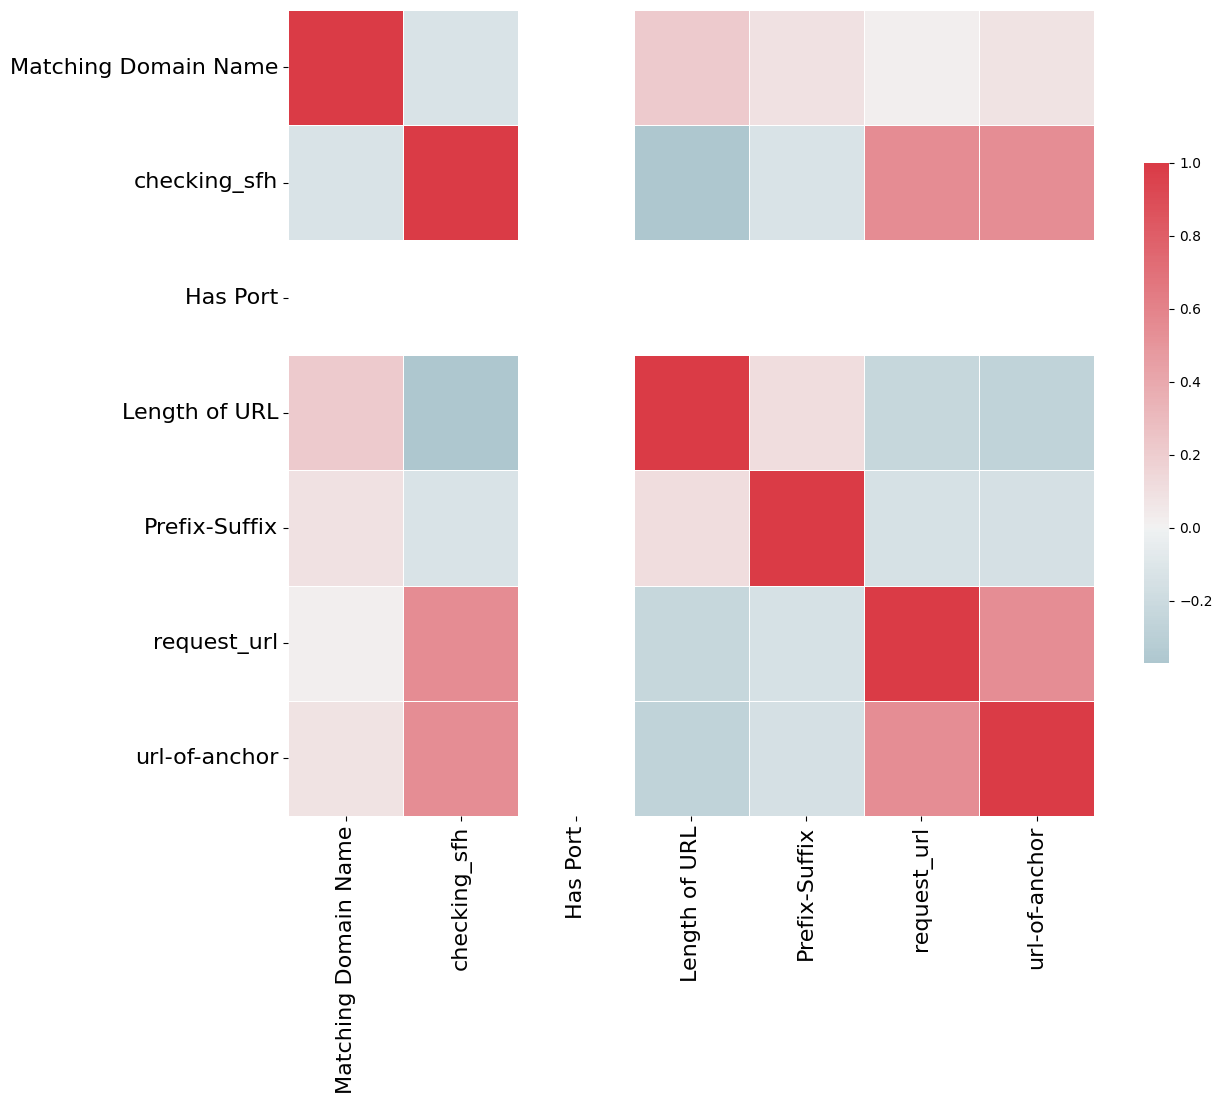

In [32]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(phishyCorr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Increase the font size of x-axis and y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16) 

plt.show()

In [20]:
filterestColumns = ['Matching_Domain_Name', 'checking_sfh', 'Has_Port', 'Length_of_URL', 'Prefix-Suffix', 'request_url', 'url-of-anchor']
filteredData = df[filterestColumns]

In [21]:
filteredData.columns

Index(['Matching_Domain_Name', 'checking_sfh', 'Has_Port', 'Length_of_URL',
       'Prefix-Suffix', 'request_url', 'url-of-anchor'],
      dtype='object')

In [22]:
filteredCorr = filteredData.corr()
filteredCorr

,Matching_Domain_Name,checking_sfh,Has_Port,Length_of_URL,Prefix-Suffix,request_url,url-of-anchor
Matching_Domain_Name,1.000000,-0.128797,0.040555,0.143485,0.126584,-0.025550,0.002541
checking_sfh,-0.128797,1.000000,-0.027772,-0.266857,-0.221899,0.423523,0.483820
Has_Port,0.040555,-0.027772,1.000000,-0.028081,0.031438,-0.019502,-0.013077
Length_of_URL,0.143485,-0.266857,-0.028081,1.000000,0.095000,-0.160853,-0.191712
Prefix-Suffix,0.126584,-0.221899,0.031438,0.095000,1.000000,-0.136609,-0.172237
request_url,-0.025550,0.423523,-0.019502,-0.160853,-0.136609,1.000000,0.551989
url-of-anchor,0.002541,0.483820,-0.013077,-0.191712,-0.172237,0.551989,1.000000


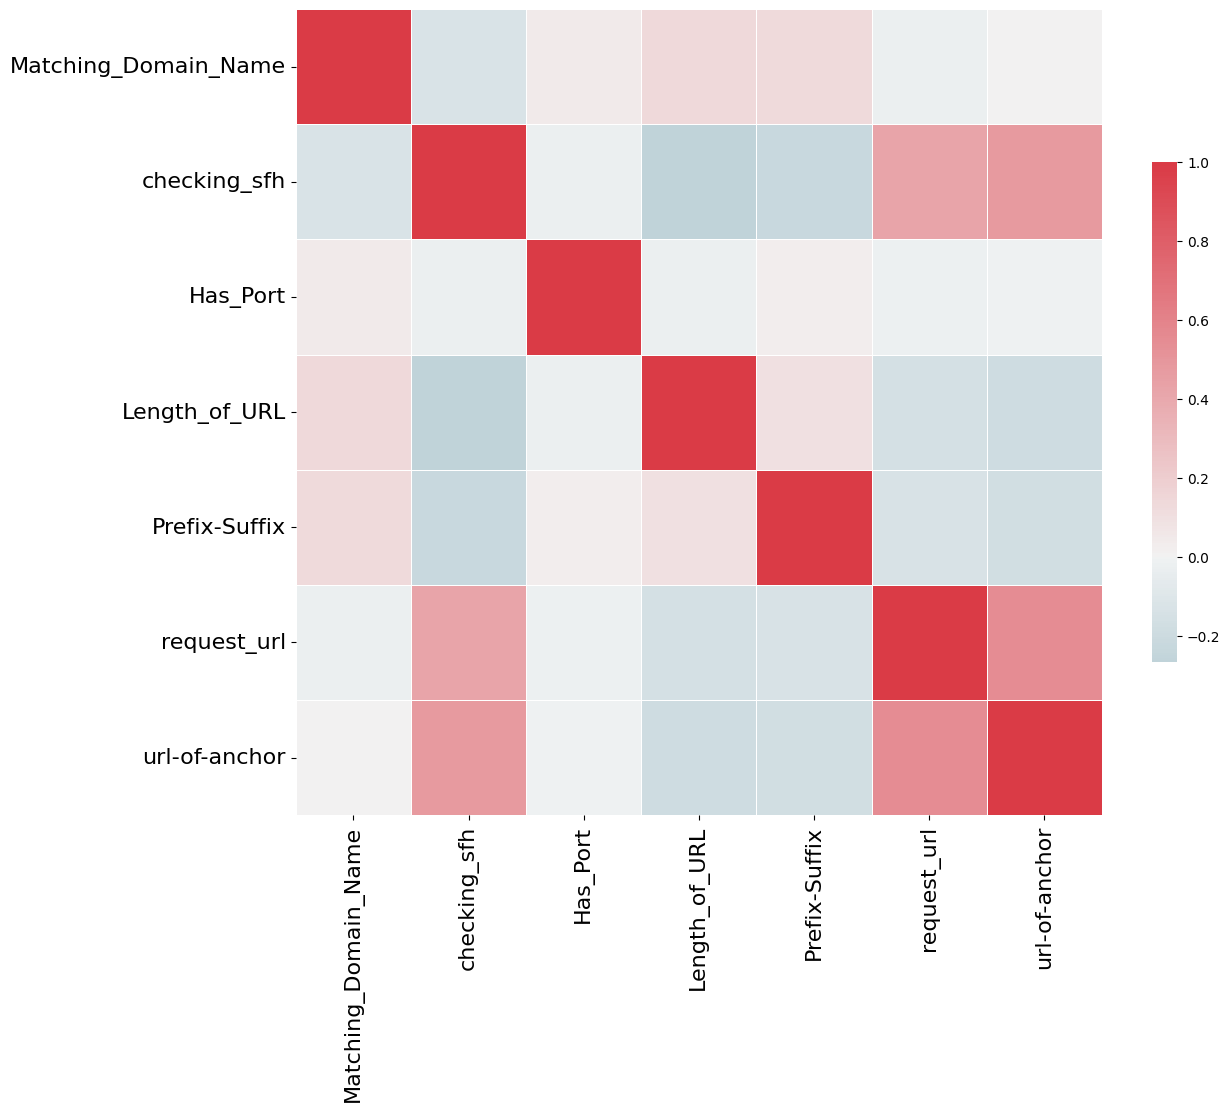

In [26]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(filteredCorr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Increase the font size of x-axis and y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16) 

plt.show()

In [27]:
corr=df.corr()
corr

,Length_of_URL,Has_IP_address,Shortening_Service,Having_@_Symbol,Double_Slash_Redirecting,Prefix-Suffix,CTLD,HTTPS_in_Domain,Sensitive_Words,Has_Tilde,...,checking_sfh,request_url,url-of-anchor,links_in_meta_img,check_hidden_content,Current_Domain_Age,Matching_Domain_Name,Length_of_Domain,Google_page_index,Result
Length_of_URL,1.000000,-0.035835,-0.041380,0.138437,0.191582,0.095000,0.199582,NaN,0.069035,0.066604,...,-0.266857,-0.160853,-0.191712,0.044081,0.033328,-0.170299,0.143485,-0.084271,0.018557,0.120430
Has_IP_address,-0.035835,1.000000,-0.017390,-0.007620,-0.011493,-0.036970,0.118131,NaN,-0.008380,0.041367,...,0.019775,0.023171,0.038350,-0.002793,0.041403,0.045227,-0.003514,0.065494,-0.009455,-0.010410
Shortening_Service,-0.041380,-0.017390,1.000000,0.001833,0.054982,-0.076637,-0.072193,NaN,0.065281,0.000508,...,0.085259,0.022893,0.043012,0.041024,0.024080,-0.037377,-0.011506,-0.053985,-0.021244,-0.133092
Having_@_Symbol,0.138437,-0.007620,0.001833,1.000000,0.394960,-0.036099,0.021410,NaN,-0.007841,-0.005828,...,-0.130501,-0.067439,-0.077026,-0.044289,0.086763,-0.041602,0.047431,-0.038287,-0.014310,-0.044657
Double_Slash_Redirecting,0.191582,-0.011493,0.054982,0.394960,1.000000,-0.071040,0.000849,NaN,0.164788,0.011435,...,-0.043591,-0.043658,-0.016006,-0.054338,0.081004,-0.032078,0.002637,-0.005962,-0.021584,-0.128159
Prefix-Suffix,0.095000,-0.036970,-0.076637,-0.036099,-0.071040,1.000000,0.134602,NaN,-0.024500,-0.012696,...,-0.221899,-0.136609,-0.172237,0.061628,-0.044975,0.090443,0.126584,0.052240,0.052917,0.404689
CTLD,0.199582,0.118131,-0.072193,0.021410,0.000849,0.134602,1.000000,NaN,0.003424,0.000971,...,-0.151575,-0.019471,-0.027861,0.152233,-0.068997,0.002628,0.317468,0.146231,0.018680,0.317096
HTTPS_in_Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sensitive_Words,0.069035,-0.008380,0.065281,-0.007841,0.164788,-0.024500,0.003424,NaN,1.000000,-0.014099,...,0.056032,-0.043940,0.005638,-0.004484,0.043716,0.022911,-0.011667,0.032685,-0.023775,-0.075839
Has_Tilde,0.066604,0.041367,0.000508,-0.005828,0.011435,-0.012696,0.000971,NaN,-0.014099,1.000000,...,0.008169,0.014139,0.011604,-0.002387,-0.005653,-0.027887,0.008812,-0.024836,-0.007232,-0.045914


<Axes: >

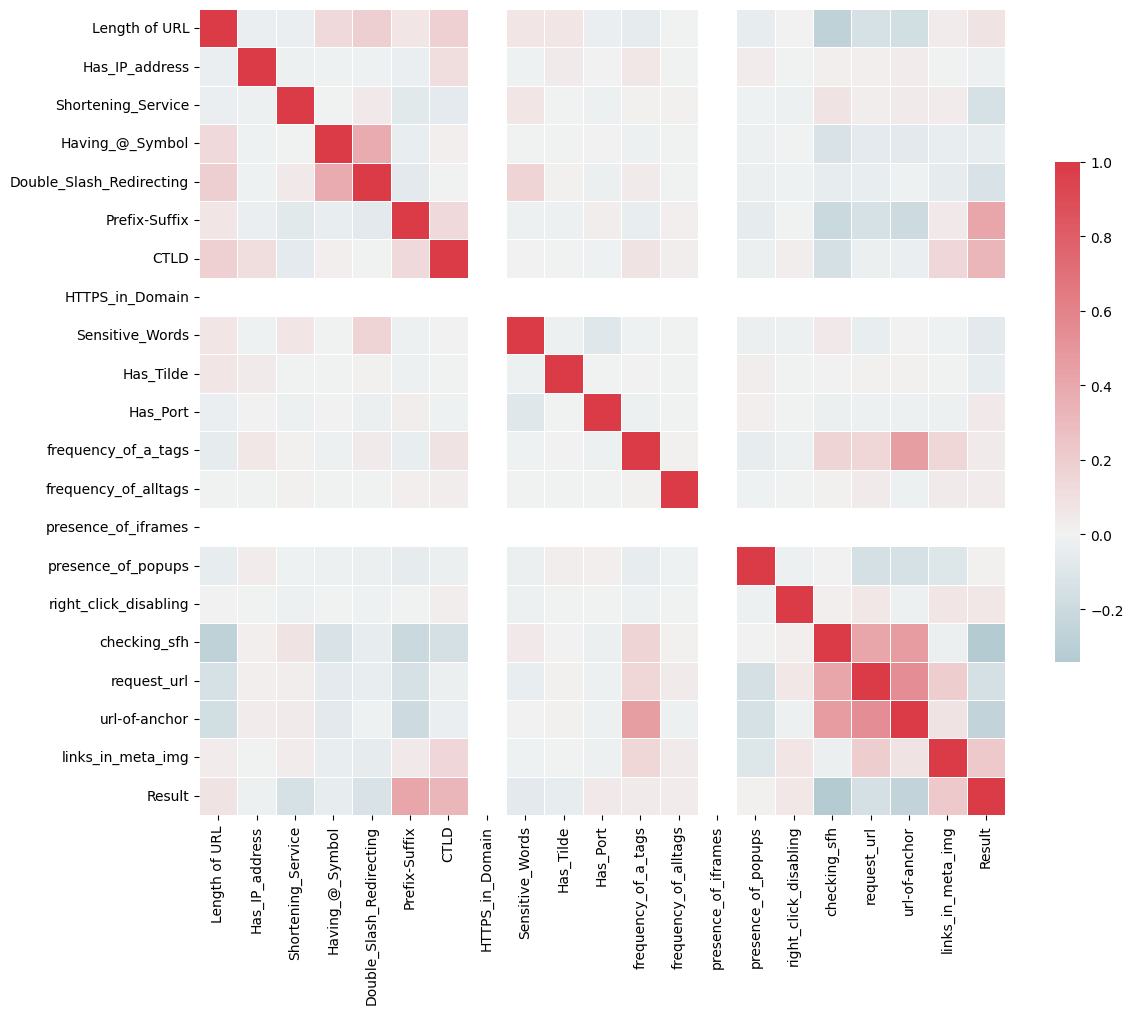

In [20]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

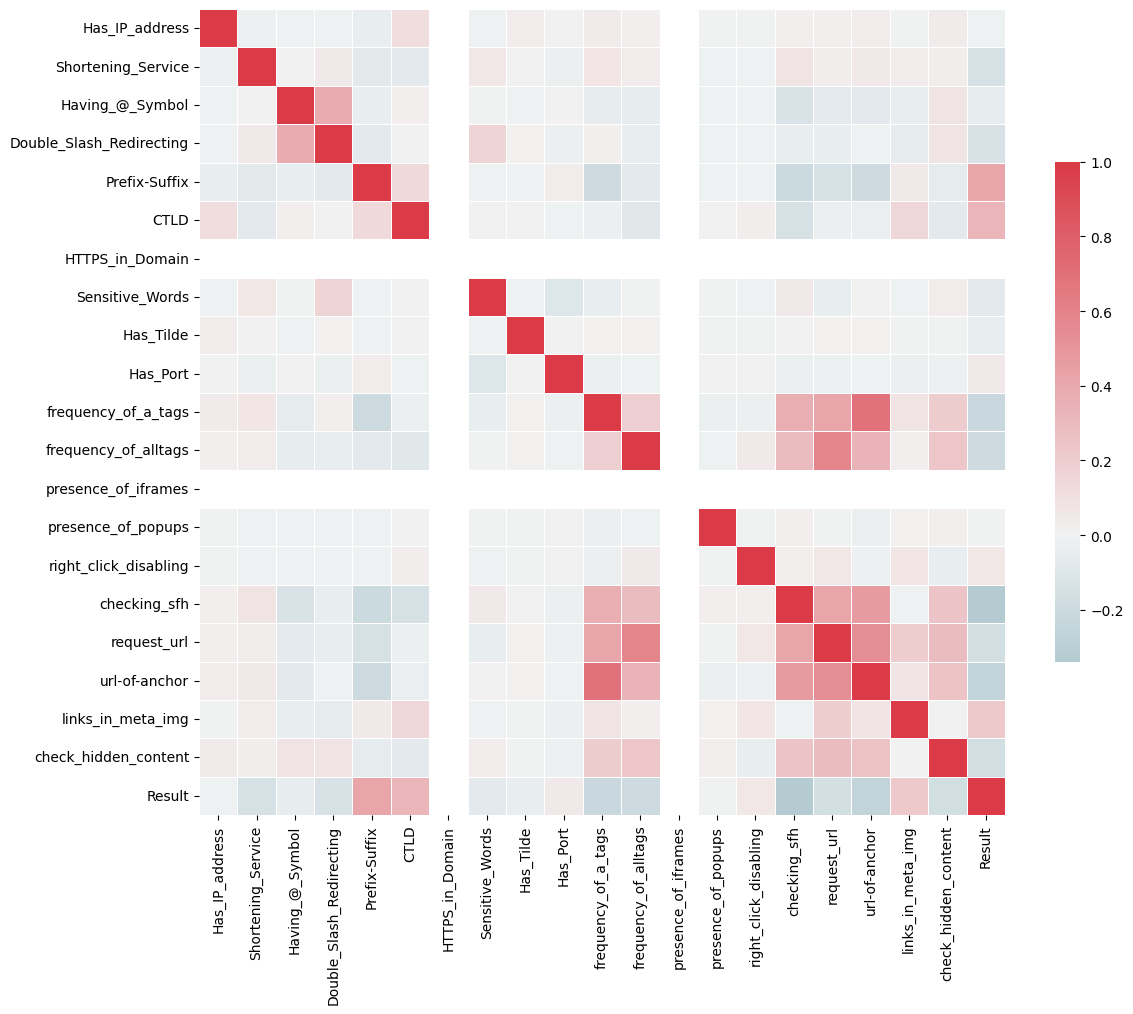

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

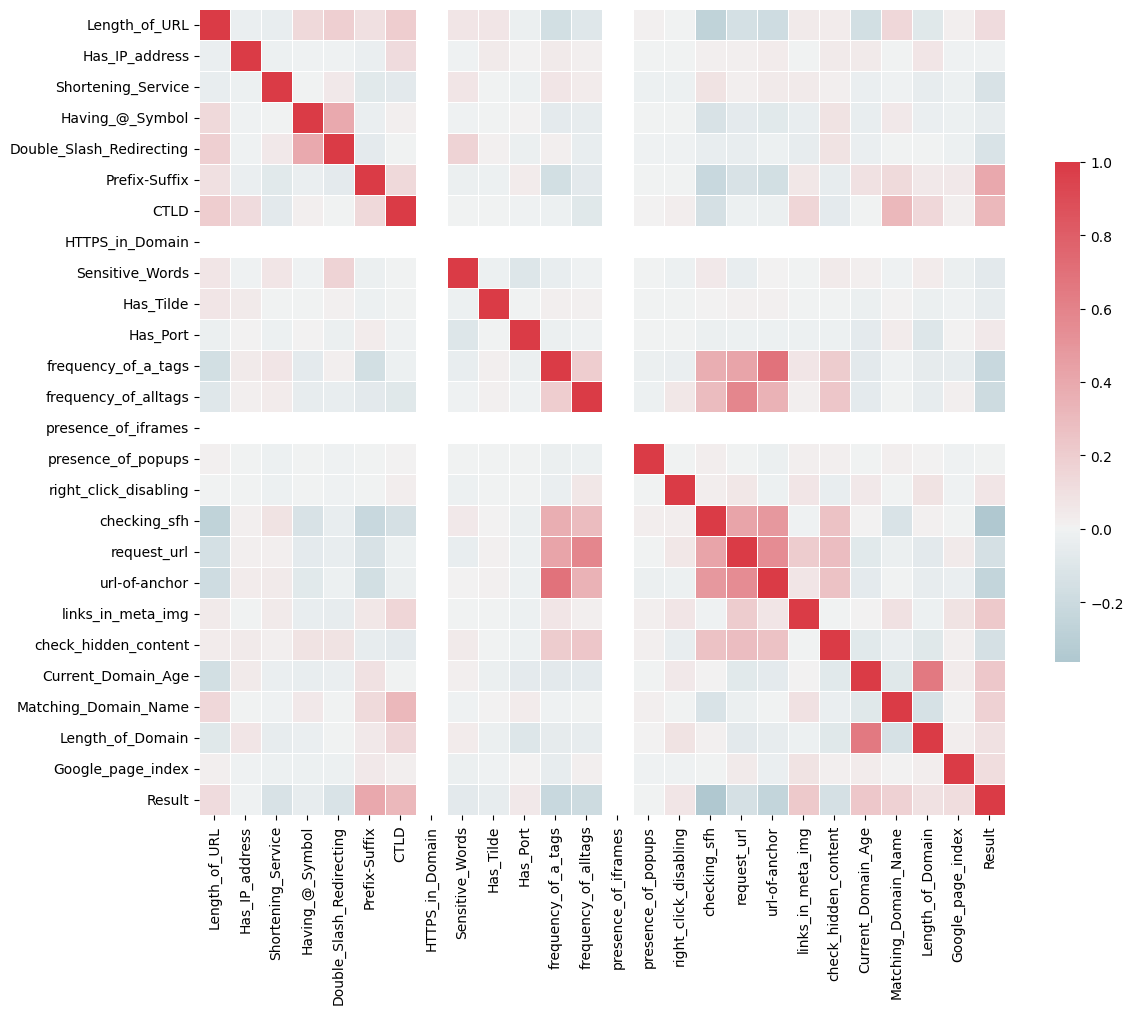

In [28]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})